# SISTEM PENDUKUNG KEPUTUSAN PEMILIHAN PEKERJAAN MENGGUNAKAN METODE FUZZY MAMDANI
STUDI KASUS: AMIK BSI TASIKMALAYA 

Kebijaksanaan dalam mengambil sebuah keputusan pada permasalahan tertentu bukan lah hal yang mudah, karena perlu dilakukan pertimbangan yang diharapkan dapat membantu memberikan alasan keputusan tertentu tersebut harus diambil. Begitu juga penanganan masalah dalam penentuan pilihan pekerjaan bagi seseorang. Pemilihan jenis pekerjaan seharusnya  disesuaikan dengan kemampuan dan minat yang dimiliki seseorang. Seseorang yang akan bekerja pada sebuah perusahaan mempertimbangkan umur, IPK, dan gaji yang diinginkan. Sistem Pendukung Keputusan Pemilihan Pekerjaan yang dikembangkan diharapkan dapat membantu calon pekerja dalam menentukan pilihannya. Penalaran Logika Fuzzy Mamdani digunakan untuk memproses data masukan yang selanjutnya digunakan untuk menghasilkan keluaran berupa rekomendasi pekerjaan apa yang tepat bagi seseorang.
Dimana metode mamdani ini digunakan untuk sistem pendukung keputusan pemilihan pekerjaan. Variabel yang digunakan berjumlah 4 variabel yaitu 3 variabel input dan 1 variabel output. 

Maka, dari latar belakang tersebut setiap keadaan dari varibel input dan output akan dijabarkan dalam linguistik sebagai berikut:
## Input
- Usia

  Kategori himpunan fuzzy:
   
   - Muda   : 20
   - Sedang : 23
   - Tua    : ≥ 26 
   
    
- IPK

   Kategori himpunan fuzzy:
   - Kurang Memuaskan : 2.7
   - Memuaskan        : 3.0
   - Sangat Memuaskan : ≥ 3.3
    
    
- Gaji

   Kategori himpunan fuzzy:
   - Rendah : 15
   - Sedang : 23
   - Tinggi : ≥ 27
 
## Output
- Keputusan

   Kategori himpunan fuzzy:
   - Sedikit : 12
   - Sedang  : 15
   - Banyak  : ≥ 18

### Mengimpor library untuk fuzzy
Library yang akan digunakan adalah numpy, dan skfuzzy. Selain itu juga menggunakan fungsi control dari library skfuzzy.

Implementasi fuzzy dengan python menggunakan modul:
- Sci-Kit Fuzzy, untuk operasi logika fuzzy.
- import library fuzzy gunakan fuzz untuk menggunakan library ini.
- from skfuzzy import control as ctrl untuk panggil library control dari skfuzzy gunakan ctrl untuk menggunakan library ini.
- Numpy, untuk pengoperasian matematika.
- import numpy gunakan np untuk menggunakan library ini.

In [1]:
import numpy as np 
import skfuzzy as fuzz 
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt

# 1. Fuzzyfikasi
### Menentukan Variabel 
Pada langkah ini, setiap variabel input dan output akan ditentukan nilainya atau penentuan batas nilai dari masing-masing variabel. Karena setiap variabel yang akan digunakan oleh proses fuzzy akan memiliki nilai numerik, dan memiliki batas awal dan batas akhir (crisp).

Menggunakan 4 variabel fuzzy, 3 sebagai input dan 1 output.

In [2]:
US = ctrl.Antecedent(np.arange(0,30, 1), 'Usia') #Variabel US untuk Usia dengan nilai 0 sampai 30 dengan range 1, Antecedent adalah library untuk 'Input'
IPK = ctrl.Antecedent(np.arange(0, 4.01, 0.01), 'IPK') #Variabel IPK untuk IPK dengan nilai 0 sampai 4.01 dengan range 0.01, Antecedent adalah library untuk 'Input'
GJ = ctrl.Antecedent(np.arange(15, 32, 1), 'Gaji') #Variabel GJ untuk Gaji dengan nilai 15 sampai 32 dengan range 1, Antecedent adalah library untuk 'Input'
KP = ctrl.Consequent(np.arange(0, 26, 1), 'Keputusan') #Variabel KP untuk Keputusan dengan nilai 0 sampai 26 dengan range 1, Consequent adalah library untuk 'Output'

USA = np.arange(0, 30,1) #Untuk Plotting 
IPKA = np.arange(0, 4.01, 0.01) #Untuk Plotting 
GJA = np.arange(15, 32, 1) #Untuk Plotting 
KPA = np.arange(0, 26, 1) #Untuk Plotting

`Antecedent` adalah sebagai input, dan `consequent` adalah kesimpulan atau sebagai output. Dan angka-angka yang terdapat di dalam kurung merupakan batas-batas (range) yang formatnya _**(batas awal, batas akhir, kelipatan)**_, selanjutnya batas tersebut diberi label dengan nama variabelnya.

# Menentukan Himpunan Fuzzy
Setelah menentukan variabel dalam bentuk numerik, selanjutnya membuat himpunan fuzzy yang direpresentasikan dalam variabel linguistik. Setiap variabel linguistik tersebut akan memiliki domain atau range dari minimal ke maksimal.

# Menentukan Fungsi Keanggotaan
Menentukan fungsi keanggotaan artinya mendefinisikan himpunan fuzzy dengan memetakan masukan crisp dari domainnya, ke derajat keanggotaan.
Pada fuzzy terdapat beberapa fungsi keanggotaan yang bisa direpresentasikan dalam beberapa format, dua diantaranya adalah kurva segitiga dan trapesium.
Karena menggunakan kurva segitiga dan trapesium, maka fungsi yang akan digunakan adalah `fuzz.trimf` untuk kurva segitiga, dan `fuzz.trapmf` untuk kurva trapesium. Untuk mendefinisikan domainnya, digunakan `variabel.universe`. Selanjutnya terdapat batas-batas(domain) yang formatnya adalah `[batas awal, titik puncak, batas akhir]` untuk kurva segitiga, `[batas awal, titik puncak, titik puncak, batas akhir]` untuk kurva trapesium.
Jadi perintahnya adalah:
`variabel['nama himpunan fuzzy'] = fuzz.trimf(variabel.universe, [batas awal, titik puncak, batas akhir])` untuk kurva segitiga, dan `variabel['nama himpunan fuzzy'] = fuzz.trapmf(variabel.universe, [batas awal, titik puncak, titik puncak, batas akhir])` untuk kurva trapesium.

# Fungsi Keanggotaan Variabel Input Umur dan Menampilkannya

Berikut adalah persamaan garis pada Input Usia :

$Muda(x) = 
\left\{
    \begin{array}{ll}
       1 & \mbox{; } x \leq 20 \\
       {23-x \over 3} & \mbox{; } 20 < x < 23 \\
       0 & \mbox{; } x \geq 23 \\
    \end{array}
\right.$

$Sedang(x) = 
\left\{
    \begin{array}{ll}
       0 & \mbox{; } x \leq 20 \\
       {x-20 \over 3} & \mbox{; } 20 < x < 23 \\
       {26-x \over 3} & \mbox{; } 23 < x < 26 \\
    \end{array}
\right.$

$Tua(x) = 
\left\{
    \begin{array}{ll}
       0 & \mbox{; } x \leq 23 \\
       {x-23 \over 3} & \mbox{; } 23 < x < 26 \\
       1 & \mbox{; } x \geq 26
    \end{array}
\right.$

Membuat membership function untuk variabel US untuk Usia

Text(0.5,1,'Usia Muda')

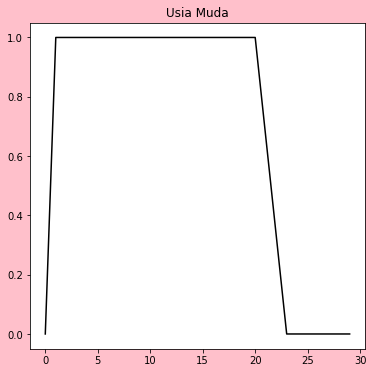

In [3]:
Usia_Muda = fuzz.trapmf(USA,[1, 1, 20, 23])
fig, (ax0) = plt.subplots(nrows=1,figsize=(6,6), facecolor='pink')
ax0.plot(USA,Usia_Muda,'black')
ax0.set_title('Usia Muda')

Text(0.5,1,'Usia Sedang')

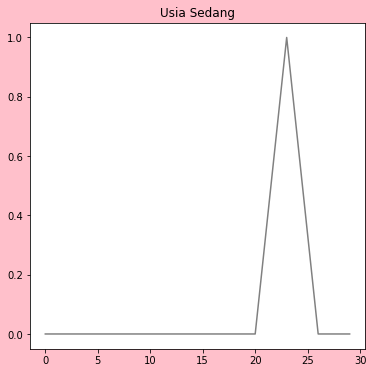

In [4]:
Usia_Sedang = fuzz.trimf(USA,[20,23,26])
fig, (ax0) = plt.subplots(nrows=1,figsize=(6,6), facecolor='pink')
ax0.plot(USA,Usia_Sedang,'grey')
ax0.set_title('Usia Sedang')

Text(0.5,1,'Usia Tua')

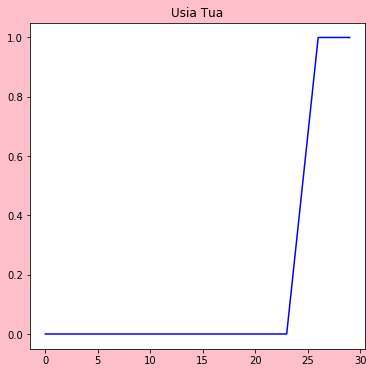

In [5]:
Usia_Tua = fuzz.trapmf(USA,[23,26,29,29])
fig, (ax0) = plt.subplots(nrows=1,figsize=(6,6), facecolor='pink')
ax0.plot(USA,Usia_Tua,'blue')
ax0.set_title('Usia Tua')

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


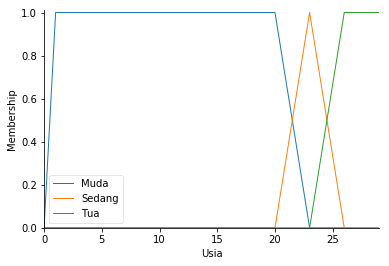

In [6]:
US['Muda'] = fuzz.trapmf(US.universe, [1, 1, 20, 23]) #Membership function Muda, dalam bentuk trapesium dengan nilai 1 - 23
US['Sedang'] = fuzz.trimf(US.universe, [20, 23, 26]) #Membership function Sedang, dalam bentuk segitiga dengan nilai 20 - 26
US['Tua'] = fuzz.trapmf(US.universe, [23, 26, 29 , 29]) #Membership function Tua, dalam bentuk trapesium dengan nilai 23 - 29

US.view() #Mencetak membership function Usia dalam satu grafik

# Fungsi Keanggotaan Variabel Input IPK dan Menampilkannya

Berikut adalah persamaan garis pada Input IPK :

$Kurang Memuaskan(x) = 
\left\{
    \begin{array}{ll}
       1 & \mbox{; } x \leq 2.7 \\
       {3.0-x \over 0.3} & \mbox{; } 2.7 < x < 3.0 \\
       0 & \mbox{; } x \geq 3.0 \\
    \end{array}
\right.$

$Memuaskan(x) = 
\left\{
    \begin{array}{ll}
       0 & \mbox{; } x \leq 2.7 \\
       {x-2.7 \over 0.3} & \mbox{; } 2.7 < x < 3.0 \\
       {3.3-x \over 0.3} & \mbox{; } 3.0 < x < 3.3 \\
    \end{array}
\right.$

$Sangat Memuaskan(x) = 
\left\{
    \begin{array}{ll}
       0 & \mbox{; } x \leq 3.0 \\
       {x-3.0 \over 0.3} & \mbox{; } 3.0 < x < 3.3 \\
       1 & \mbox{; } x \geq 3.3 \\      
    \end{array}
\right.$

Membuat membership function untuk variabel IPK untuk IPK

Text(0.5,1,'Kurang Memuaskan')

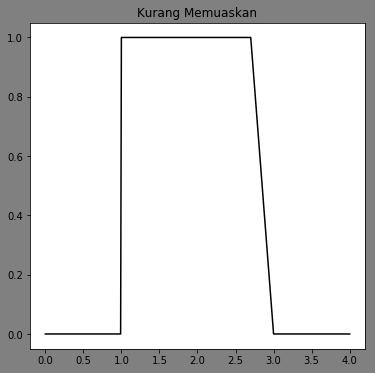

In [7]:
Kurang_Memuaskan = fuzz.trapmf(IPKA,[1, 1, 2.7, 3])
fig, (ax0) = plt.subplots(nrows=1,figsize=(6,6), facecolor='grey')
ax0.plot(IPKA,Kurang_Memuaskan,'black')
ax0.set_title('Kurang Memuaskan')

Text(0.5,1,'Memuaskan')

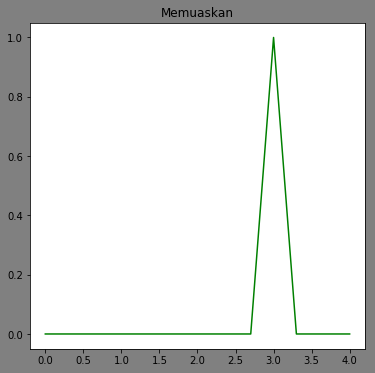

In [8]:
Memuaskan = fuzz.trimf(IPKA,[2.7,3,3.3])
fig, (ax0) = plt.subplots(nrows=1,figsize=(6,6), facecolor='grey')
ax0.plot(IPKA,Memuaskan,'green')
ax0.set_title('Memuaskan')

Text(0.5,1,'Sangat Memuaskan')

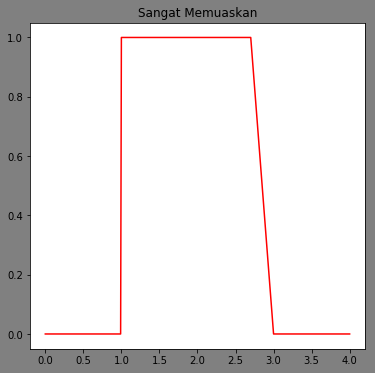

In [9]:
Sangat_Memuaskan = fuzz.trapmf(IPKA,[3, 3.3, 4, 4])
fig, (ax0) = plt.subplots(nrows=1,figsize=(6,6), facecolor='grey')
ax0.plot(IPKA,Kurang_Memuaskan,'red')
ax0.set_title('Sangat Memuaskan')

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


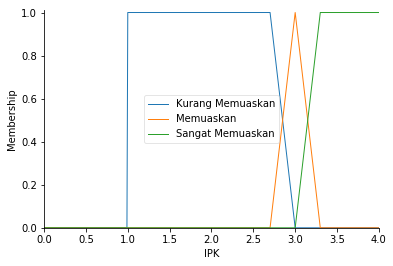

In [10]:
IPK['Kurang Memuaskan'] = fuzz.trapmf(IPK.universe, [1, 1, 2.7, 3]) #Membership function Kurang Memuaskan, dalam bentuk trapesium dengan nilai 1 - 3
IPK['Memuaskan'] = fuzz.trimf(IPK.universe, [2.7, 3, 3.3]) #Membership function Memuaskan, dalam bentuk segitiga dengan nilai 2.7 - 3.3
IPK['Sangat Memuaskan'] = fuzz.trapmf(IPK.universe, [3, 3.3, 4, 4]) #Membership function Sangat Memuaskan, dalam bentuk trapesium dengan nilai 3 - 4

IPK.view() #Mencetak membership function IPK dalam satu grafik

# Fungsi Keanggotaan Variabel Input Gaji dan Menampilkannya

Berikut adalah persamaan garis pada Input Gaji :

$Rendah(x) = 
\left\{
    \begin{array}{ll}
       1 & \mbox{; } x \leq 19 \\
       {23-x \over 4} & \mbox{; } 19 < x < 23 \\
       0 & \mbox{; } x \geq 23
    \end{array}
\right.$

$Sedang(x) = 
\left\{
    \begin{array}{ll}
       0 & \mbox{; } x \leq 19 \\
       {x-19 \over 4} & \mbox{; } 19 < x < 23 \\
       {27-x \over 4} & \mbox{; } 23 < x < 27 \\
    \end{array}
\right.$

$Tinggi(x) = 
\left\{
    \begin{array}{ll}
       0 & \mbox{; } x \leq 23 \\
       {x-23 \over 4} & \mbox{; } 23 < x < 27 \\
       1 & \mbox{; } x \geq 27 \\
    \end{array}
\right.$

Membuat membership function untuk variabel GJ untuk Gaji

Text(0.5,1,'Rendah')

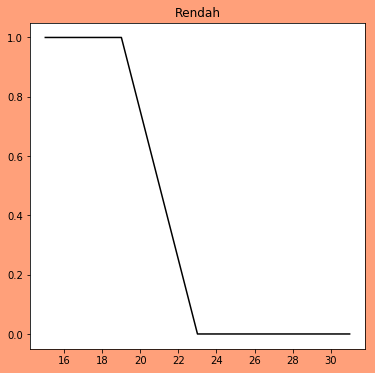

In [11]:
Rendah = fuzz.trapmf(GJA,[15, 15, 19, 23])
fig, (ax0) = plt.subplots(nrows=1,figsize=(6,6), facecolor='lightsalmon')
ax0.plot(GJA,Rendah,'black')
ax0.set_title('Rendah')

Text(0.5,1,'Sedang')

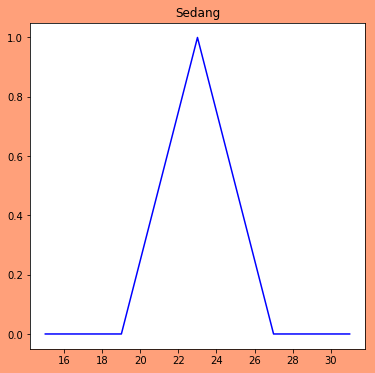

In [12]:
Sedang = fuzz.trimf(GJA,[19, 23, 27])
fig, (ax0) = plt.subplots(nrows=1,figsize=(6,6), facecolor='lightsalmon')
ax0.plot(GJA,Sedang,'blue')
ax0.set_title('Sedang')

Text(0.5,1,'Tinggi')

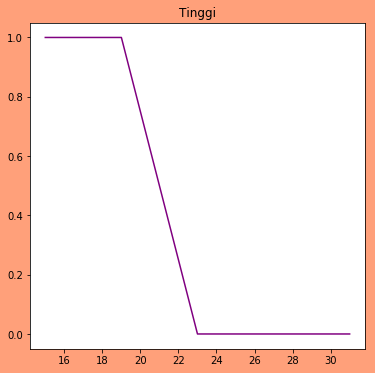

In [13]:
Tinggi = fuzz.trapmf(GJA,[23, 27, 31, 31])
fig, (ax0) = plt.subplots(nrows=1,figsize=(6,6), facecolor='lightsalmon')
ax0.plot(GJA,Rendah,'purple')
ax0.set_title('Tinggi')

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


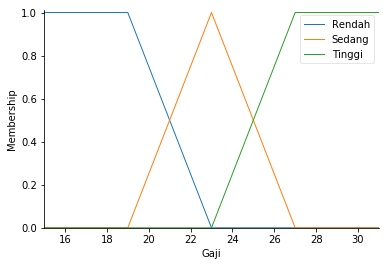

In [14]:
GJ['Rendah'] = fuzz.trapmf(GJ.universe, [15, 15, 19, 23]) #Membership function Rendah, dalam bentuk trapesium dengan nilai 15 - 23
GJ['Sedang'] = fuzz.trimf(GJ.universe, [19, 23, 27]) #Membership function Sedang, dalam bentuk segitiga dengan nilai 19 - 27
GJ['Tinggi'] = fuzz.trapmf(GJ.universe, [23, 27, 31, 31]) #Membership function Tinggi, dalam bentuk trapesium dengan nilai 23 - 31

GJ.view() #Mencetak membership function Gaji dalam satu grafik

# Fungsi Keanggotaan Variabel Output Keputusan

Berikut adalah persamaan garis pada Output keputusan :

$Pabrik(x) = 
\left\{
    \begin{array}{ll}
       1 & \mbox{; } x \leq 12 \\
       {15-x \over 3} & \mbox{; } 12 < x < 15 \\
       0 & \mbox{; } x \geq 15
    \end{array}
\right.$

$Bank(x) = 
\left\{
    \begin{array}{ll}
       0 & \mbox{; } x \leq 12 \\
       {x-12 \over 3} & \mbox{; } 12 < x < 15 \\
       {18-x \over 3} & \mbox{; } 15 < x < 18 \\
    \end{array}
\right.$

$Pegawai(x) = 
\left\{
    \begin{array}{ll}
       0 & \mbox{; } x \leq 15 \\
       {x-15 \over 3} & \mbox{; } 15 < x < 18 \\
       {20-x \over 2} & \mbox{; } 18 < x < 20 \\
    \end{array}
\right.$

$Pendidik(x) = 
\left\{
    \begin{array}{ll}
       0 & \mbox{; } x \leq 18 \\
       {x-18 \over 2} & \mbox{; } 18 < x < 20 \\
       1 & \mbox{; } x \geq 20 \\
    \end{array}
\right.$

Membuat membership function untuk variabel KP untuk Keputusan

Text(0.5,1,'Pabrik')

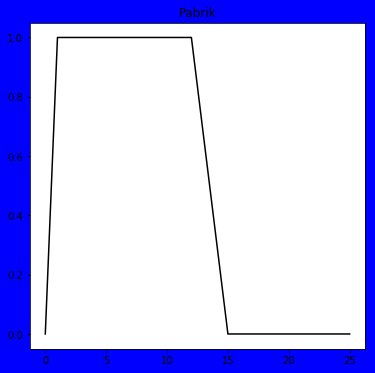

In [15]:
Pabrik = fuzz.trapmf(KPA,[1, 1, 12, 15])
fig, (ax0) = plt.subplots(nrows=1,figsize=(6,6), facecolor='blue')
ax0.plot(KPA,Pabrik,'black')
ax0.set_title('Pabrik')

Text(0.5,1,'Bank')

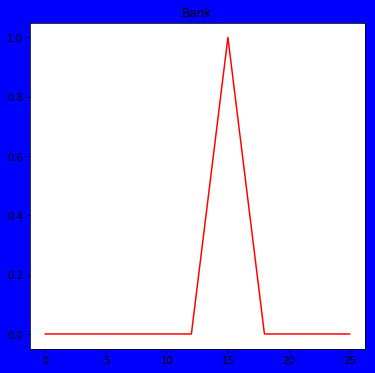

In [16]:
Bank = fuzz.trimf(KPA,[12, 15, 18])
fig, (ax0) = plt.subplots(nrows=1,figsize=(6,6), facecolor='blue')
ax0.plot(KPA,Bank,'red')
ax0.set_title('Bank')

Text(0.5,1,'Pegawai')

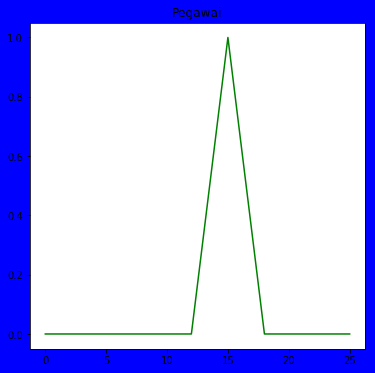

In [17]:
Pegawai = fuzz.trimf(KPA,[15, 18, 20])
fig, (ax0) = plt.subplots(nrows=1,figsize=(6,6), facecolor='blue')
ax0.plot(KPA,Bank,'green')
ax0.set_title('Pegawai')

Text(0.5,1,'Pendidik')

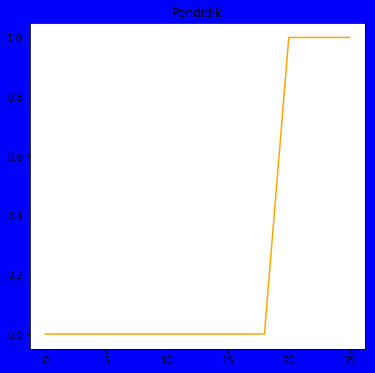

In [18]:
Pendidik = fuzz.trapmf(KPA,[18, 20, 25, 25])
fig, (ax0) = plt.subplots(nrows=1,figsize=(6,6), facecolor='blue')
ax0.plot(KPA,Pendidik,'orange')
ax0.set_title('Pendidik')

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


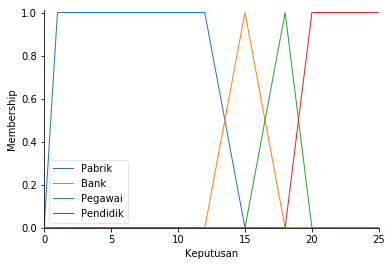

In [19]:
KP['Pabrik'] = fuzz.trapmf(KP.universe, [1, 1, 12, 15]) #Membership function Pabrik, dalam bentuk trapesium dengan nilai 1 - 15
KP['Bank'] = fuzz.trimf(KP.universe, [12, 15, 18]) #Membership function Bank, dalam bentuk segitiga dengan nilai 12 - 18
KP['Pegawai'] = fuzz.trimf(KP.universe, [15, 18, 20]) #Membership function Pegawai, dalam bentuk trapesium dengan nilai 15 - 25
KP['Pendidik'] = fuzz.trapmf(KP.universe, [18, 20, 25, 25]) #Membership function Pegawai, dalam bentuk trapesium dengan nilai 15 - 25

KP.view() #Mencetak membership function Keputusan dalam satu grafik

# 2. Rule Base

| No |    Usia   |      IPK       |     Gaji    |  Keputusan  |
|----|-----------|----------------|-------------|-------------|
| 1  |    Muda   |Kurang Memuaskan|   Rendah    |   Pabrik    |
| 2  |    Muda   |Kurang Memuaskan|   Sedang    |   Pabrik    |
| 3  |    Muda   |Kurang Memuaskan|   Tinggi    |   Pabrik    |
| 4  |    Muda   |    Memuaskan   |   Rendah    |   Pabrik    |
| 5  |    Muda   |    Memuaskan   |   Sedang    |    Bank     |
| 6  |    Muda   |    Memuaskan   |   Tinggi    |    Bank     |
| 7  |    Muda   |Sangat Memuaskan|   Rendah    |    Bank     |
| 8  |    Muda   |Sangat Memuaskan|   Sedang    |    Bank     |
| 9  |    Muda   |Sangat Memuaskan|   Tinggi    |    Bank     |
| 10 |   Sedang  |Kurang Memuaskan|   Rendah    |   Pabrik    |
| 11 |   Sedang  |Kurang Memuaskan|   Sedang    |   Pabrik    |
| 12 |   Sedang  |Kurang Memuaskan|   Tinggi    |   Pabrik    |
| 13 |   Sedang  |    Memuaskan   |   Rendah    |   Pabrik    |
| 14 |   Sedang  |    Memuaskan   |   Sedang    |    Bank     |
| 15 |   Sedang  |    Memuaskan   |   Tinggi    |   Pegawai   |
| 16 |   Sedang  |Sangat Memuaskan|   Rendah    |    Bank     |
| 17 |   Sedang  |Sangat Memuaskan|   Sedang    |   Pendidik  |
| 18 |   Sedang  |Sangat Memuaskan|   Tinggi    |   Pegawai   |
| 19 |    Tua    |Kurang Memuaskan|   Rendah    |   Pabrik    |
| 20 |    Tua    |Kurang Memuaskan|   Sedang    |   Pabrik    |
| 21 |    Tua    |Kurang Memuaskan|   Tinggi    |   Pabrik    |
| 22 |    Tua    |    Memuaskan   |   Rendah    |   Pabrik    |
| 23 |    Tua    |    Memuaskan   |   Sedang    |   Pendidik  |
| 24 |    Tua    |    Memuaskan   |   Tinggi    |   Pendidik  |
| 25 |    Tua    |Sangat Memuaskan|   Rendah    |    Bank     |
| 26 |    Tua    |Sangat Memuaskan|   Sedang    |   Pegawai   |
| 27 |    Tua    |Sangat Memuaskan|   Tinggi    |   Pendidik  |

<center>__Tabel 1.1 Rule yang Digunakan__

Membuat Rule Base untuk menentukan Keputusan Pemilihan Pekerjaan dan menampilkannya :
    
Karena Input ada 3 dan setiap Input memiliki 3 kondisi maka Rule Base yang didapat 3^3 = 27

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x67771d0>)

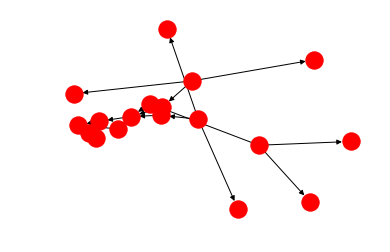

In [20]:
Rule1 = ctrl.Rule (US ['Muda']& IPK ['Kurang Memuaskan']& GJ ['Rendah'], KP ['Pabrik'])

Rule1.view() #Mencetak gambar Rule Base

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x88d52b0>)

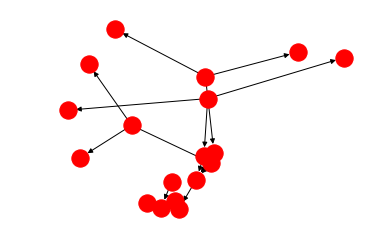

In [21]:
Rule2 = ctrl.Rule (US ['Muda']& IPK ['Kurang Memuaskan']& GJ ['Sedang'], KP ['Pabrik'])

Rule2.view() #Mencetak gambar Rule Base

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x9520170>)

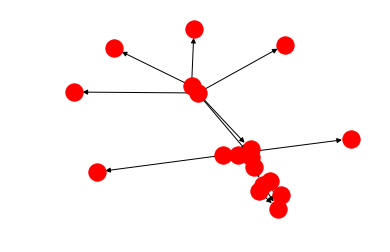

In [22]:
Rule3 = ctrl.Rule (US ['Muda']& IPK ['Kurang Memuaskan']& GJ ['Tinggi'], KP ['Pabrik'])

Rule3.view() #Mencetak gambar Rule Base

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x956c310>)

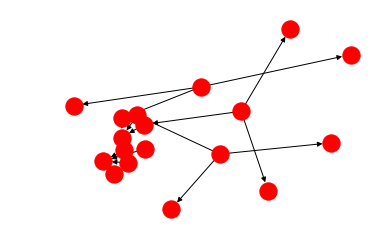

In [23]:
Rule4 = ctrl.Rule (US ['Muda']& IPK ['Memuaskan']& GJ ['Rendah'], KP ['Pabrik'])

Rule4.view() #Mencetak gambar Rule Base

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x96fb150>)

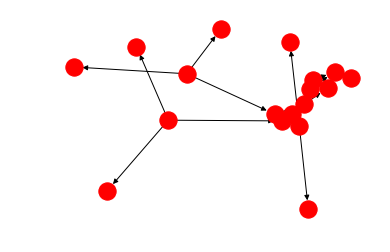

In [24]:
Rule5 = ctrl.Rule (US ['Muda']& IPK ['Memuaskan']& GJ ['Sedang'], KP ['Bank'])

Rule5.view() #Mencetak gambar Rule Base

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x9746210>)

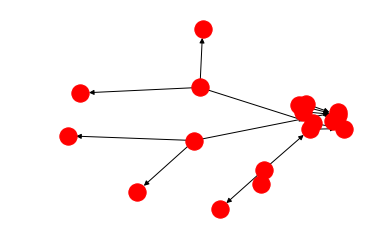

In [25]:
Rule6 = ctrl.Rule (US ['Muda']& IPK ['Memuaskan']& GJ ['Tinggi'], KP ['Bank'])

Rule6.view() #Mencetak gambar Rule Base

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x9794430>)

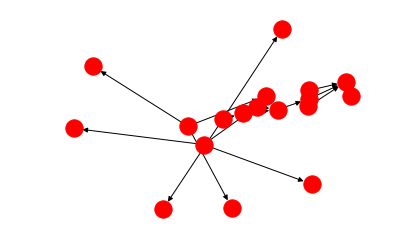

In [26]:
Rule7 = ctrl.Rule (US ['Muda']& IPK ['Sangat Memuaskan']& GJ ['Rendah'], KP ['Bank'])

Rule7.view() #Mencetak gambar Rule Base

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x97e0230>)

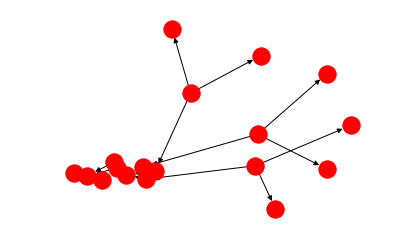

In [27]:
Rule8 = ctrl.Rule (US ['Muda']& IPK ['Sangat Memuaskan']& GJ ['Sedang'], KP ['Bank'])

Rule8.view() #Mencetak gambar Rule Base

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x982c230>)

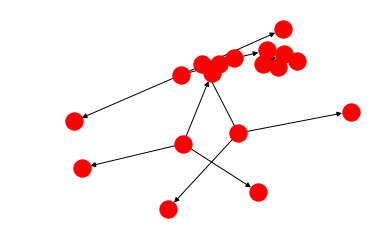

In [28]:
Rule9 = ctrl.Rule (US ['Muda']& IPK ['Sangat Memuaskan']& GJ ['Tinggi'], KP ['Bank'])

Rule9.view() #Mencetak gambar Rule Base

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x9878250>)

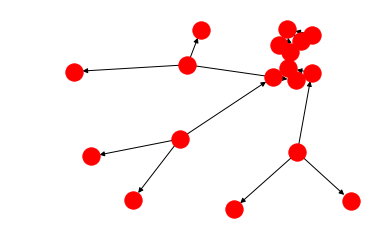

In [29]:
Rule10 = ctrl.Rule (US ['Sedang']& IPK ['Kurang Memuaskan']& GJ ['Rendah'], KP ['Pabrik'])

Rule10.view() #Mencetak gambar Rule Base

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x98ae430>)

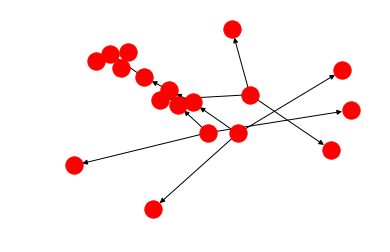

In [30]:
Rule11 = ctrl.Rule (US ['Sedang']& IPK ['Kurang Memuaskan']& GJ ['Sedang'], KP ['Pabrik'])

Rule11.view() #Mencetak gambar Rule Base

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x88bfd90>)

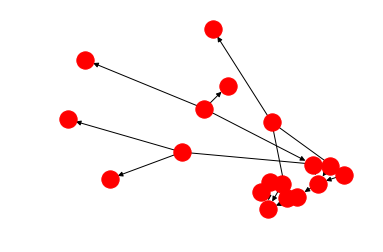

In [31]:
Rule12 = ctrl.Rule (US ['Sedang']& IPK ['Kurang Memuaskan']& GJ ['Tinggi'], KP ['Pabrik'])

Rule12.view() #Mencetak gambar Rule Base

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0xc5e4130>)

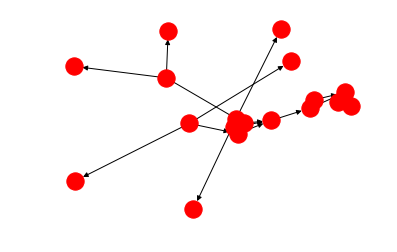

In [32]:
Rule13 = ctrl.Rule (US ['Sedang']& IPK ['Memuaskan']& GJ ['Rendah'], KP ['Pabrik'])

Rule13.view() #Mencetak gambar Rule Base

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0xc637ef0>)

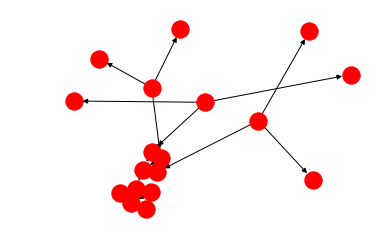

In [33]:
Rule14 = ctrl.Rule (US ['Sedang']& IPK ['Memuaskan']& GJ ['Sedang'], KP ['Bank'])

Rule14.view() #Mencetak gambar Rule Base

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0xd7fa530>)

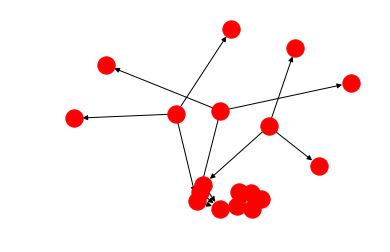

In [34]:
Rule15 = ctrl.Rule (US ['Sedang']& IPK ['Memuaskan']& GJ ['Tinggi'], KP ['Pegawai'])

Rule15.view() #Mencetak gambar Rule Base

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0xd850b70>)

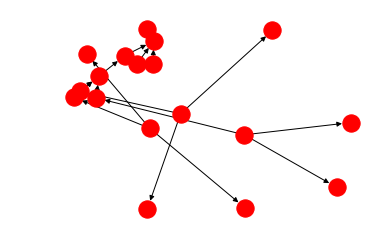

In [35]:
Rule16 = ctrl.Rule (US ['Sedang']& IPK ['Sangat Memuaskan']& GJ ['Rendah'], KP ['Bank'])

Rule16.view() #Mencetak gambar Rule Base

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0xd89ab50>)

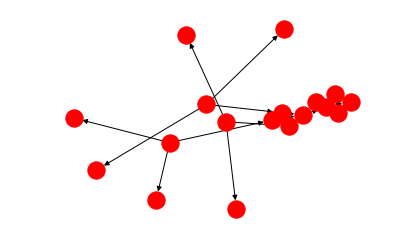

In [36]:
Rule17 = ctrl.Rule (US ['Sedang']& IPK ['Sangat Memuaskan']& GJ ['Sedang'], KP ['Pendidik'])

Rule17.view() #Mencetak gambar Rule Base

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0xd8ea9f0>)

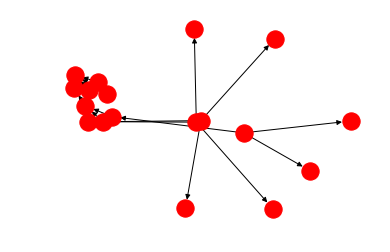

In [37]:
Rule18 = ctrl.Rule (US ['Sedang']& IPK ['Sangat Memuaskan']& GJ ['Tinggi'], KP ['Pegawai'])

Rule18.view() #Mencetak gambar Rule Base

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0xd936810>)

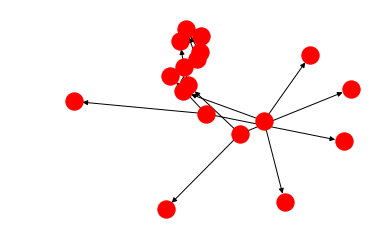

In [38]:
Rule19 = ctrl.Rule (US ['Tua']& IPK ['Kurang Memuaskan']& GJ ['Rendah'], KP ['Pabrik'])

Rule19.view() #Mencetak gambar Rule Base

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0xd9835f0>)

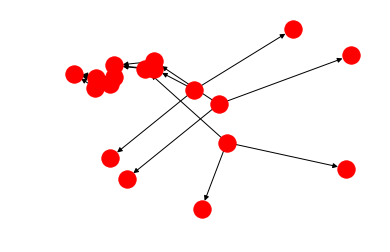

In [39]:
Rule20 = ctrl.Rule (US ['Tua']& IPK ['Kurang Memuaskan']& GJ ['Sedang'], KP ['Pabrik'])

Rule20.view() #Mencetak gambar Rule Base

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0xd9ce450>)

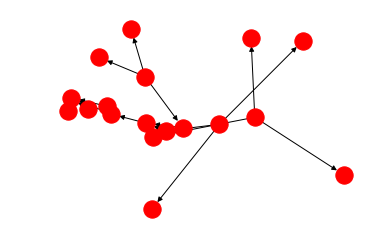

In [40]:
Rule21 = ctrl.Rule (US ['Tua']& IPK ['Kurang Memuaskan']& GJ ['Tinggi'], KP ['Pabrik'])

Rule21.view() #Mencetak gambar Rule Base

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0xda1c630>)

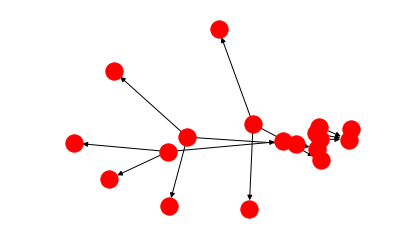

In [41]:
Rule22 = ctrl.Rule (US ['Tua']& IPK ['Memuaskan']& GJ ['Rendah'], KP ['Pabrik'])

Rule22.view() #Mencetak gambar Rule Base

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0xda67470>)

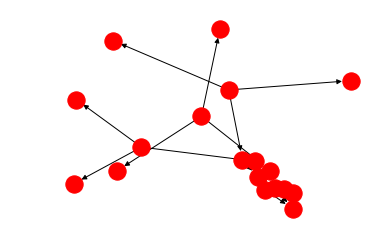

In [42]:
Rule23 = ctrl.Rule (US ['Tua']& IPK ['Memuaskan']& GJ ['Sedang'], KP ['Pendidik'])

Rule23.view() #Mencetak gambar Rule Base

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0xdab3330>)

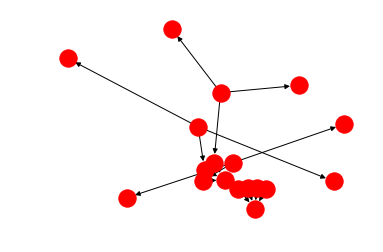

In [43]:
Rule24 = ctrl.Rule (US ['Tua']& IPK ['Memuaskan']& GJ ['Tinggi'], KP ['Pendidik'])

Rule24.view() #Mencetak gambar Rule Base

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0xdafdb50>)

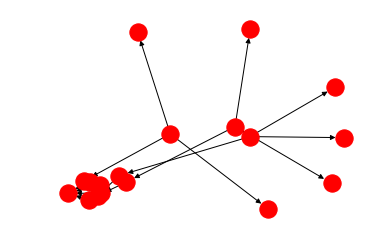

In [44]:
Rule25 = ctrl.Rule (US ['Tua']& IPK ['Sangat Memuaskan']& GJ ['Rendah'], KP ['Bank'])

Rule25.view() #Mencetak gambar Rule Base

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0xeb1b9d0>)

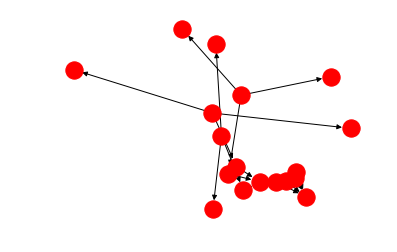

In [45]:
Rule26 = ctrl.Rule (US ['Tua']& IPK ['Sangat Memuaskan']& GJ ['Sedang'], KP ['Pegawai'])

Rule26.view() #Mencetak gambar Rule Base

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0xeb69670>)

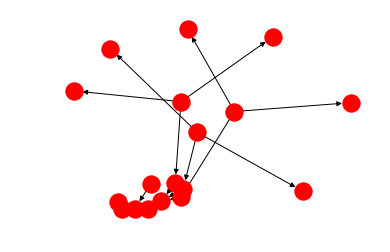

In [46]:
Rule27 = ctrl.Rule (US ['Tua']& IPK ['Sangat Memuaskan']& GJ ['Tinggi'], KP ['Pendidik'])

Rule27.view() #Mencetak gambar Rule Base

# 3. Proses Inferens
Pada tahap inferensi, membuat aturan-aturan fuzzy yang dinyatakan dalam bentuk IF .... THEN ....

Pada sistem ini berdasarkan jumlah fuzzifikasi dari variabel input yang berjumlah 3, maka rule yang dibuat berjumlah 3^3 = 27 rule

1. IF Usia Muda AND IPK Kurang Memuaskan AND Gaji Rendah THEN Keputusannya adalah Pabrik
2. IF Usia Muda AND IPK Kurang Memuaskan AND Gaji Sedang THEN Keputusannya adalah Pabrik
3. IF Usia Muda AND IPK Kurang Memuaskan AND Gaji Tinggi THEN Keputusannya adalah Pabrik 
4. IF Usia Muda AND IPK Memuaskan AND Gaji Rendah THEN Keputusannya adalahh Pabrik 
5. IF Usia Muda AND IPK Memuaskan AND Gaji Sedang THEN Keputusannya adalah Bank 
6. IF Usia Muda AND IPK Memuaskan AND Gaji Tinggi THEN Keputusannya adalah Bank 
7. IF Usia Muda AND IPK Sangat Memuaskan AND Gaji Rendah THEN Keputusannya adalah Bank 
8. IF Usia Muda AND IPK Sangat Memuaskan AND Gaji Sedang THEN Keputusannya adalah Bank  
9. IF Usia Muda AND IPK Sangat Memuaskan AND Gaji Tinggi THEN Keputusannya adalah Bank 
10. IF Usia Sedang AND IPK Kurang Memuaskan AND Gaji Rendah THEN Keputusannya adalah Pabrik
11. IF Usia Sedang AND IPK Kurang Memuaskan AND Gaji Sedang THEN Keputusannya adalah Pabrik
12. IF Usia Sedang AND IPK Kurang Memuaskan AND Gaji Tinggi THEN Keputusannya adalah Pabrik
13. IF Usia Sedang AND IPK Memuaskan AND Gaji Rendah THEN Keputusannya adalah Pabrik  
14. IF Usia Sedang AND IPK Memuaskan AND Gaji Sedang THEN Keputusannya adalah Bank 
15. IF Usia Sedang AND IPK Memuaskan AND Gaji Tinggi THEN Keputusannya adalah Pegawai  
16. IF Usia Sedang AND IPK Sangat Memuaskan AND Gaji Rendah THEN Keputusannya adalah Bank 
17. IF Usia Sedang AND IPK Sangat Memuaskan AND Sedang THEN Keputusannya adalah Pendidik
18. IF Usia Sedang AND IPK Sangat Memuaskan AND Tinggi THEN Keputusannya adalah Pegawai 
19. IF Usia Tua AND IPK Kurang Memuaskan AND Gaji Rendah THEN Keputusannya adalah Pabrik 
20. IF Usia Tua AND IPK Kurang Memuaskan AND Gaji Sedang THEN Keputusannya adalah Pabrik 
21. IF Usia Tua AND IPK Kurang Memuaskan AND Gaji Tinggi THEN Keputusannya adalah Pabrik 
22. IF Usia Tua AND IPK Memuaskan AND Gaji Rendah THEN Keputusannya adalah Pabrik 
23. IF Usia Tua AND IPK Memuaskan AND Gaji Sedang THEN Keputusannya adalah Pendidik
24. IF Usia Tua AND IPK Memuaskan AND Gaji Tinggi THEN Keputusannya adalah Pendidik 
25. IF Usia Tua AND IPK Sangat Memuaskan AND Gaji Rendah THEN Keputusannya adalah Bank 
26. IF Usia Tua AND IPK Sangat Memuaskan AND Sedang THEN Keputusannya adalah Pegawai 
27. IF Usia Tua AND IPK Sangat Memuaskan AND Tinggi THEN Keputusannya adalah Pendidik

# 4. DEFUZZYFIKASI

Defuzzifikasi adalah pengubahan output fuzzy yang diperoleh dari mesin inferens menjadi nilai tegas menggunakan fungsi keanggotaan yang sesuai saat dilakukannya fuzzifikasi.

# Menggabungkan semua rule untuk dijadikan sebagai Control System

In [47]:
Keputusan_Rule1 = ctrl.ControlSystem([Rule1, Rule2, Rule3, Rule4, Rule5, Rule6, Rule7, Rule8, Rule9, 
                                Rule10, Rule11, Rule12, Rule13, Rule14, Rule15, Rule16, Rule17, Rule18,
                                Rule19, Rule20, Rule21, Rule22, Rule23, Rule24, Rule25, Rule26, Rule27])

# Menggunakan Mode Simulasi

In [48]:
Keputusan_Rule = ctrl.ControlSystemSimulation(Keputusan_Rule1)

# Simulasi dengan memasukan nilai pada Variabel Input

In [49]:
US = input('Usia :') #Membuat inputan untuk Usia           
IPK = input('IPK : ') #Membuat inputan untuk IPK
GJ = input('Gaji : ') #Membuat inputan untuk Gaji

Usia :29
IPK : 4
Gaji : 31


Karena di atas sudah melakukan proses fuzzyfikasi, selanjutnya akan membuktikan dengan perhitungannya.

In [50]:
Keputusan_Rule.input['Usia'] = float(US) #Mengubah format data Usia menjadi float, dan memasukkannya kedalam kontrol sistem berdasarkan kondisi yang telah dibuat
Keputusan_Rule.input['IPK'] = float(IPK) #Mengubah format data IPK menjadi float, dan memasukkannya kedalam kontrol sistem berdasarkan kondisi yang telah dibuat
Keputusan_Rule.input['Gaji'] = float(GJ) #Mengubah format data Gaji menjadi float, dan memasukkannya kedalam kontrol sistem berdasarkan kondisi yang telah dibuat

Keputusan_Rule.compute() #Menghitung jumlahnya

# Menampilkan grafik hasil Defuzzyfikasi

21.972222222222225


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


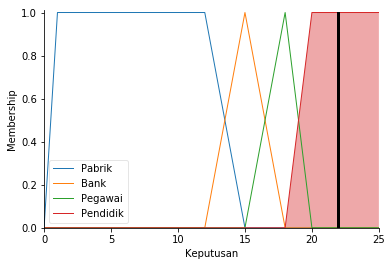

In [51]:
print(Keputusan_Rule.output['Keputusan']) #Mencetak Output Keputusan berdasarkan kondisi yg telah di penuhi
KP.view(sim=Keputusan_Rule) #Membuat plot/grafik dari Keputusan dengan kondisi berada pada Keputusan_Rule yang telah terpenuhi

# PENYELESAIAN DENGAN PERHITUNGAN MANUAL DEFUZZYFIKASI

Mencari Nilai X1, X2, X3 :

- X1 = 2/3x20+18 = 2/3x38 = 25.3
    
- X2 = 1/2x22+20 = 1/2x42 = 21
   
- X3 = 1/2x25+22 = 1/2x47 = 23.5

Mencari Nilai A1, A2, A3 :

- A1 = 1/2x(20-18)x0.5 = 0.2
    
- A2 = (22-20)x1 = 2
    
- A3 = (25-2)x1 = 3/2 = 3

$$z=\frac{(X1xA1)+(X2xA2)+(X3xA3)}{A1+A2+A3}$$

$$z=\frac{(25.3x0.2)+(21x2)+(23.5x3)}{0.2+2+3}$$

$$z=\frac{117.5}{5.2}$$

$$z= 22.59$$

Hasil perhitungan Output (Keputusan) yang didapat menggunakan Code Python sebesar 21.97, sedangkan jika menggunakan perhitungan manual sebesar 22.59, disini terdapat perbedaan sebesar 0.62.

Sumber : https://ejournal.bsi.ac.id/ejurnal/index.php/ji/article/view/109